In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df=pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cdf=df[["CYLINDERS","CO2EMISSIONS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_COMB"]]
cdf.head()

,CYLINDERS,CO2EMISSIONS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB
0,4,196,9.9,8.5
1,4,221,11.2,9.6
2,4,136,6.0,5.9
3,6,255,12.7,11.1
4,6,244,12.1,10.6


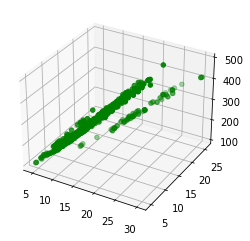

In [4]:


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter3D(cdf[["FUELCONSUMPTION_CITY"]], cdf[["FUELCONSUMPTION_COMB"]], cdf[["CO2EMISSIONS"]], color="green");

plt.show()

In [5]:
from sklearn.model_selection import train_test_split
x=cdf[["FUELCONSUMPTION_CITY","FUELCONSUMPTION_COMB"]]
y=cdf[["CO2EMISSIONS"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [6]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(x_train,y_train)
print(regr.coef_, regr.intercept_)

[[17.78608877 -4.76745413]] [74.53714554]


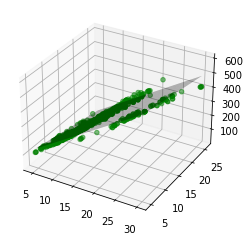

In [17]:
x_surf,y_surf=np.meshgrid(np.linspace(cdf.FUELCONSUMPTION_CITY.min(),cdf.FUELCONSUMPTION_CITY.max(),100),np.linspace(cdf.FUELCONSUMPTION_COMB.min(),cdf.FUELCONSUMPTION_COMB.max(),100))
onlyX=pd.DataFrame({"FUELCONSUMPTION_CITY":x_surf.ravel(),"FUELCONSUMPTION_COMB":y_surf.ravel()})
fittedY=regr.predict(onlyX)
fittedY=np.array(fittedY)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter3D(cdf[["FUELCONSUMPTION_CITY"]], cdf[["FUELCONSUMPTION_COMB"]], cdf[["CO2EMISSIONS"]], color="green",marker='o',alpha=0.5);
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape),color="None",alpha=0.3)

plt.show()

,FUELCONSUMPTION_CITY
194,16.7
438,23.7
111,15.0
531,13.6
85,10.6
...,...
260,7.6
519,11.3
208,14.8
996,12.2
